##### 말 복통 데이터

```
누락된 값들
```

In [1]:
from pandas import read_csv

# 말 복통 데이터
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
# 데이터 세트 로드
dataframe = read_csv(url, header=None, na_values='?')

# 처음 5개의 데이터 확인
print(dataframe.head())

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


##### 말 복통 데이터

```
값이 많이 누락된 특성
 - 15번 : 82.3%
 - 21번 : 66.0%

```

In [2]:
from pandas import read_csv

# 말 복통 데이터
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
# 데이터 세트 로드
dataframe = read_csv(url, header=None, na_values='?')

for index in range(dataframe.shape[1]):
	# 누락값들의 비율 확인
	n_miss = dataframe[[index]].isnull().sum()
	perc = n_miss / dataframe.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (index, n_miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


##### 말 복통 데이터

```
누락 개수 : 1,605
```

In [1]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

# 말 복통 데이터
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
# 데이터 세트 로드
dataframe = read_csv(url, header=None, na_values='?')

# 데이터 분할
data = dataframe.values
ix = [index for index in range(data.shape[1]) if index != 23]
X, y = data[:, ix], data[:, 23]
# 누락 개수
print('Missing: %d' % sum(isnan(X).flatten()))

# 평균 계산
imputer = SimpleImputer(strategy='mean')
# 누락된 값을 평균으로 대치
Xtrans = imputer.fit_transform(X)

# 누락 개수
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


##### 말 복통 데이터

```
k폴드 교차 검증
 - 86.3%
```

In [4]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# 말 복통 데이터
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
# 데이터 세트 로드
dataframe = read_csv(url, header=None, na_values='?')

# 데이터 분할
data = dataframe.values
ix = [index for index in range(data.shape[1]) if index != 23]
X, y = data[:, ix], data[:, 23]

# 랜덤 포레스트
model = RandomForestClassifier()
# 누락된 값을 평균으로 대치
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# k폴드 교차 검증
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# 모델 평가
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.863 (0.048)


##### 말 복통 데이터

```
k폴드 교차 검증
 - 평균 : 86.0%
 - 중앙값 : 86.2%
 - 빈도수 : 87.2%
 - 상수 : 88.1%
```

>mean 0.867 (0.054)
>median 0.869 (0.053)
>most_frequent 0.861 (0.055)
>constant 0.882 (0.052)


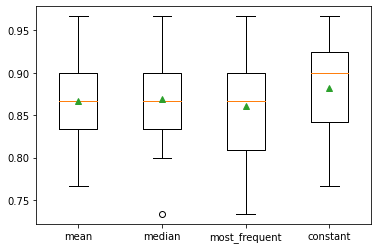

In [5]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# 말 복통 데이터
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
# 데이터 세트 로드
dataframe = read_csv(url, header=None, na_values='?')

# 데이터 분할
data = dataframe.values
ix = [index for index in range(data.shape[1]) if index != 23]
X, y = data[:, ix], data[:, 23]

# 결과 저장
results = list()
# 데이터 전가 방식(평균, 중앙값, 빈도수, 상수)
strategies = ['mean', 'median', 'most_frequent', 'constant']

for s in strategies:
	# 랜덤 포레스트
	model = RandomForestClassifier()
	# 누락된 값을 평균, 중앙값, 빈도수, 상수로 대치
	imputer = SimpleImputer(strategy=s)
	pipeline = Pipeline(steps=[('index', imputer), ('m', model)])

	# k폴드 교차 검증
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# 결과 저장
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

# k폴드 교차 검증 결과와 데이터 전가 방식
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()